In [ ]:
import pandas as pd

D_MAP_MAT = {
    "19Q4": "MAT20Q3",
    "20Q1": "MAT20Q3",
    "20Q2": "MAT20Q3",
    "20Q3": "MAT20Q3",
    "20Q4": "MAT21Q3",
    "21Q1": "MAT21Q3",
    "21Q2": "MAT21Q3",
    "21Q3": "MAT21Q3",
}

D_MAP_GATEGORY = {
    "缬沙坦": "ARB",
    "厄贝沙坦": "ARB",
    "氯沙坦": "ARB",
    "替米沙坦": "ARB",
    "坎地沙坦": "ARB",
    "奥美沙坦酯": "ARB",
    "阿利沙坦酯": "ARB",
    "培哚普利": "ACEI",
    "贝那普利": "ACEI",
    "沙库巴曲缬沙坦钠": "ARNI",
}

df = pd.read_excel("./普瑞快思-2021Q3.xlsx", engine="openpyxl", sheet_name="标准片数")
df["MAT"] = df["日期"].map(D_MAP_MAT)
df["品类"] = df["通用名"].map(D_MAP_GATEGORY)

In [59]:
import numpy as np
from data_class import Rx

source = "门诊"
unit = "标准片数"
dept = None
category = "ARNI"
molecule = None

mask = (df["原始诊断"]!="无诊断") & (df["统计项"]==unit) & (df["来源"]==source)
if dept is not None:
    mask = mask & (df["关注科室"]==dept)
if molecule is not None:
    mask = mask & (df["通用名"]==molecule)
if category is not None:
    if category == "ARB":
        mask = mask& (df["通用名"].isin(["缬沙坦","厄贝沙坦","氯沙坦","替米沙坦","奥美沙坦酯","阿利沙坦酯","坎地沙坦"]))
    elif category == "ACEI":
        mask = mask& (df["通用名"].isin(["培哚普利","贝那普利"]))
    elif category == "ARNI":
        mask = mask& (df["通用名"].isin(["沙库巴曲缬沙坦钠"]))
    elif category == "RAAS平片":
        mask = mask& (~df["通用名"].isin(["沙库巴曲缬沙坦钠"]))

# mask = mask & (df["日期"]=="20Q4")

df2 = df.loc[mask,:]
df2.rename({"日期":"季度"},axis="columns",inplace=True)

if category is None and molecule is not None:
    if dept is not None:
        title = f"{molecule} - {source}{dept} - {unit}"
    else:
        title = f"{molecule} - {source} - {unit}"
elif category is not None and molecule is None:
    if dept is not None:
        title = f"{category} - {source}{dept} - {unit}"
    else:
        title = f"{category} - {source} - {unit}"
elif category is None and molecule is None:
    if dept is not None:
        title = f"RAAS平片 vs. ARNI - {source}{dept} - {unit}"
    else:
        title = f"RAAS平片 vs. ARNI - {source} - {unit}"
else:
    if dept is not None:
        title = f"{category} - {molecule} - {source}{dept} - {unit}"
    else:
        title = f"{category} - {molecule} - {source} - {unit}"
        
r = Rx(df2, name=title)
r_pre = Rx(df2[df2["MAT"] == "MAT20Q3"], name=f"{title} - MAT20Q3")
r_post = Rx(df2[df2["MAT"] == "MAT21Q3"], name=f"{title} - MAT21Q3")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\venv37\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:191: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


In [ ]:
# 整体表现
# r.plot_total_bar(groupby="MAT")
# r.plot_group_barh("品类", same_xlim=True)
r.plot_group_barh("通用名")

[0.3444093391881762, 0.5288402932614131, 0.2245543147010428]
(0.11985502448713337, 0.3042859785603703, 0.2245543147010428) [0.3444093391881762, 0.5288402932614131]
['高血压', '心力衰竭']


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:191: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


[0.3444093391881762, 0.5876464116369867, 0.5288402932614131, 0.2191238182402368, 0.2245543147010428, 0.34526906637327553, 0.17552211631144912]
(0.07625332255834572, 0.19877564333492348, 0.04360170192878768, 0.13453902849854393, 0.04903219838959369, 0.1697469500618264, 0.17552211631144912) [0.3444093391881762, 0.5876464116369867, 0.5288402932614131]
['高血压', '冠心病', '心力衰竭']


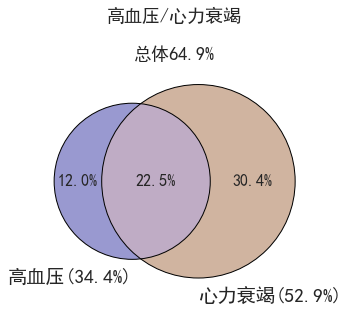

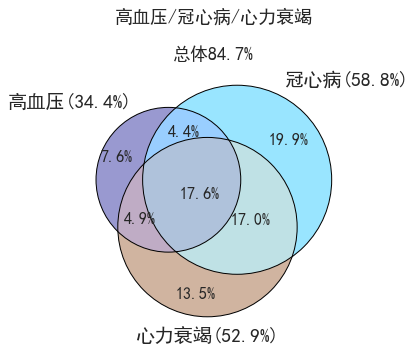

In [60]:
# r_post.plot_venn(["高血压", "冠心病"])
# r_post.plot_venn(["高血压", "血脂异常"])
# r_post.plot_venn(["高血压", "冠心病","血脂异常"])
r_post.plot_venn(["高血压", "心力衰竭"])
r_post.plot_venn(["高血压", "冠心病", "心力衰竭"])
# r_post.wordcloud()
# r.plot_group_barh("季度", same_xlim=True)


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\data_class.py:191: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


[0.4720744143051103, 0.07109994126200032, 0.8416250204620084, 0.04855032691067011, 0.36389827733965013, 0.053440024650701495, 0.038472426842302926]
(0.09809823689709296, 0.007582016542931655, 0.01007790006836718, 0.4627591453139597, 0.3254258504973472, 0.01496759780839857, 0.038472426842302926) [0.4720744143051103, 0.07109994126200032, 0.8416250204620084]
['高血压', '糖尿病', '慢性肾病']


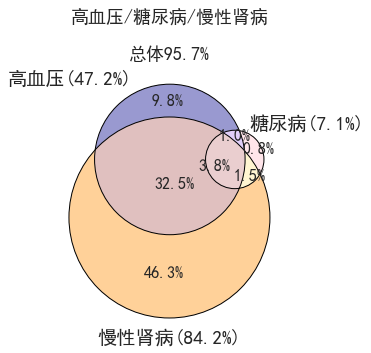

In [57]:
# Venn
# for como in ["血脂异常", "糖尿病", "慢性肾病", "卒中"]:
#     r_pre.plot_venn(["高血压","冠心病",  como])
#     r_post.plot_venn(["高血压","冠心病",  como])
r_post.plot_venn(["高血压","糖尿病","慢性肾病"])

In [ ]:
# 适应症个数及top具体处方适应症
# r.plot_intersect(groupby="MAT")


In [ ]:
# 各种交叉结果
# r_post.plot_group_barh(groupby="关注科室")
# r.plot_group_barh(groupby="关注科室", diffby="MAT")
# r_post.plot_group_barh(groupby="通用名")
# r.plot_group_barh(groupby="通用名", diffby="MAT")
# r_post.plot_venn(["高血压", "冠心病","血脂异常"])
# r_post.plot_venn(["高血压", "慢性肾病"])


In [ ]:
mask = df2["通用名"] == '沙库巴曲缬沙坦钠'
df3 =  df2.loc[mask,:]
r_arni = Rx(df3, name="沙库巴曲标准片数")
r_arni.plot_barh("日期")

In [ ]:
mask = df3["日期"] == "21Q3"
df4 = df3.loc[mask,:]
r_arni_q3 = Rx(df4, name="沙库巴曲标准片数_21Q3")
r_arni_q3.plot_venn(["高血压", "冠心病", "心力衰竭"])

In [ ]:
r.plot_ca("通用名", len_set=2, labels_in=["高血压"])